# Cursul 7

## Stabilitatea echilibrelor

Am văzut în cursul precedent că sistemul $$\begin{aligned}P_{t+1} & = P_t\left(1+1,3\left(1-P_t\right)\right)-0,5P_tQ_t \\ Q_{t+1} & = 0,3Q_t+1,6P_tQ_t.\end{aligned}$$ are echilibrul $\left(P^*,Q^*\right) = (0,4375,1,4625)$ către care tind majoritatea traiectoriilor valorilor inițiale. Dar comportarea nu este simplă: traiectoria se apropie de echilibru, apoi se îndepărtează, apoi se apropie mai tare, etc, dar pare totuși că pe termen lung nu mai pleacă din vecinătatea echilibrului.

Chiar dacă simularea pare să ducă la această concluzie, este mai bine să avem și un argument matematic. Vom proceda analog cu cazul dimensiunii 1. Ca și atunci vom prespune că $$\begin{aligned} P_t & = P^*+p_t \\ Q_t & = Q^*+q_t.\end{aligned}$$ Înlocuim în sistem și obținem $$\begin{aligned}0,4375 + p_{t+1} & = (0,4375 +p_t)(1+1,3(1-(0,4375+p_t)))-0,5(0,4375+p_t)(1,4625+q_t) \\ 1,4625+q_{t+1} & = 0,3(1,4625+q_t)+1,6(0,4375 + p_t)(1,4625+q_t).\end{aligned}$$ După ce efectuăm calculele găsim $$\begin{aligned}p_{t+1} & = 0,43125p_t-0,21875q_t-1,3p_t^2-0.5p_tq_t \\ q_{t+1} &= 2,34 p_t+q_t+1,6p_tq_t. \end{aligned}$$ Am presupus că că $P_t$ și $Q_t$ sînt aproape de $(P^*,Q^*)$ deci $p_t$ și $q_t$ sînt aproape de $0$, deci $p_t^2,q_t^2,p_tq_t$ sînt și mai mici și le vom neglija. Prin urmare
$$\begin{aligned}p_{t+1} & \approx 0,43125 p_t -0,21875 q_t \\ q_{t+1} & \approx 2,34 p_t +q_t.  \end{aligned}$$

Am aproximat astfel sistemul nostru neliniar cu unul liniar și putem studia stabilitatea cu metoda de la sisteme liniare, anume folosind valorile proprii ale matricei de proiecție. Mai jos calculăm valorile proprii și modulul acestora. Se vede că $|\lambda_1|=|\lambda_2|=0,971146,$ mai mici ca $1$ deci echilibrul într-adevăr este stabil. 

Procedeul general de liniarizare folosește noțiunea de derivate parțiale pe care le vom studia în cursul următor. Pentru moment ne concentrăm pe sistemele neliniare de tip $2\times 2$. Modelul liniarizat va fi descris de o matrice cu $2$ linii și $2$ coloane și deci cu $2$ valori proprii $\lambda_1$ și $\lambda_2$. Avem mai multe posibiltăți

* Dacă $|\lambda_1| < 1$ și $|\lambda_2| < 1$, atunci echilibrul este stabil;
* Dacă $|\lambda_1| > 1$ și $|\lambda_2| > 1$, atunci echilibrul este instabil;
* Dacă $|\lambda_1| < 1$ și $|\lambda_2| >1$ avem un tip nou de instabilitate numit *punct șa*.

Pentru un punct șa comportamentul este o combinație de între vectorul propriu cu $|\lambda_1| < 1$, care va atrage spre echilibru și cel cu $|\lambda_2| >1$
care ne va îndepărta de echilibru.

In [9]:
using LinearAlgebra
using LaTeXStrings
using IJulia

A=[0.43125 -0.21875; 2.34 1]
l1 = eigvals(A)[1]
l2 = eigvals(A)[2]
println("\nModulele valorile proprii sînt: ", abs(l1)," ",abs(l2))
eigvals(A)


Modulele valorile proprii sînt: 0.9711462299777516 0.9711462299777516


2-element Vector{ComplexF64}:
 0.715625 - 0.6565103650171868im
 0.715625 + 0.6565103650171868im

P0=  1.1
Q0=  2.2
Timpul final =  100


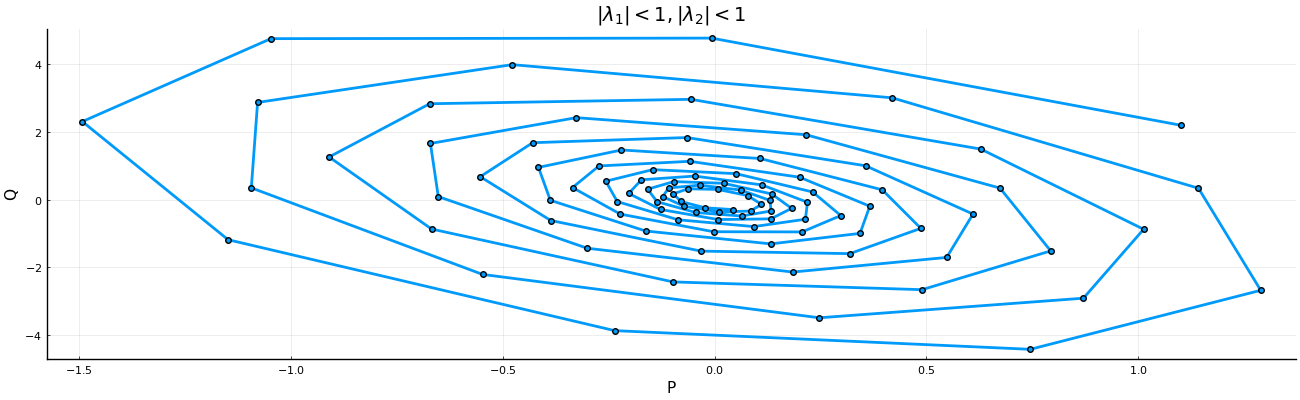

In [7]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=0.43125*P-0.21875*Q
    Q1=2.34*P+Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="",title=L"|\lambda_1| <1 , |\lambda_2|<1")
xaxis!("P")
yaxis!("Q")


P0=  0.5
Q0=  1.2
Timpul final =  20


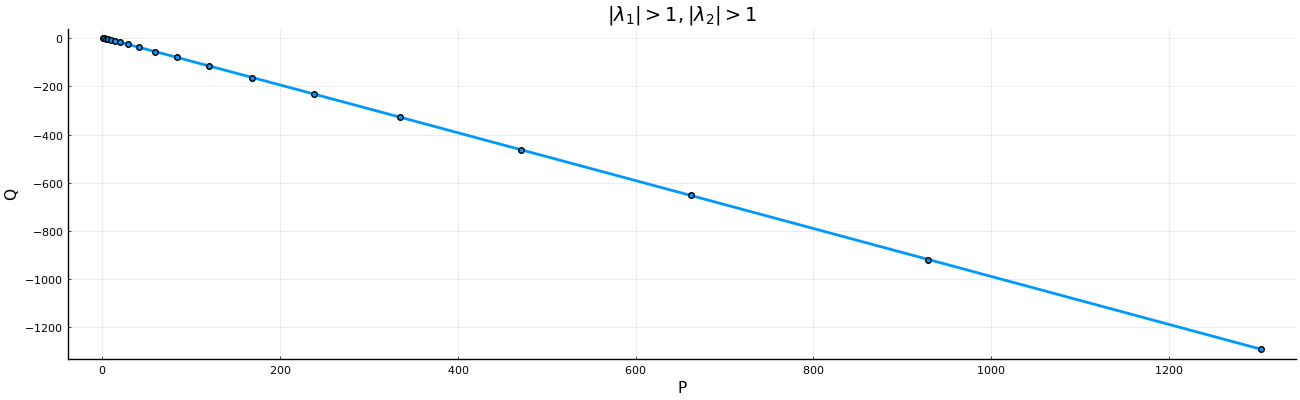

In [13]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=1.7*P+0.3*Q
    Q1=-0.6*P+0.8*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="",title=L"|\lambda_1| >1 , |\lambda_2|>1")
xaxis!("P")
yaxis!("Q")

P0=  2.2
Q0=  1.1
Timpul final =  20


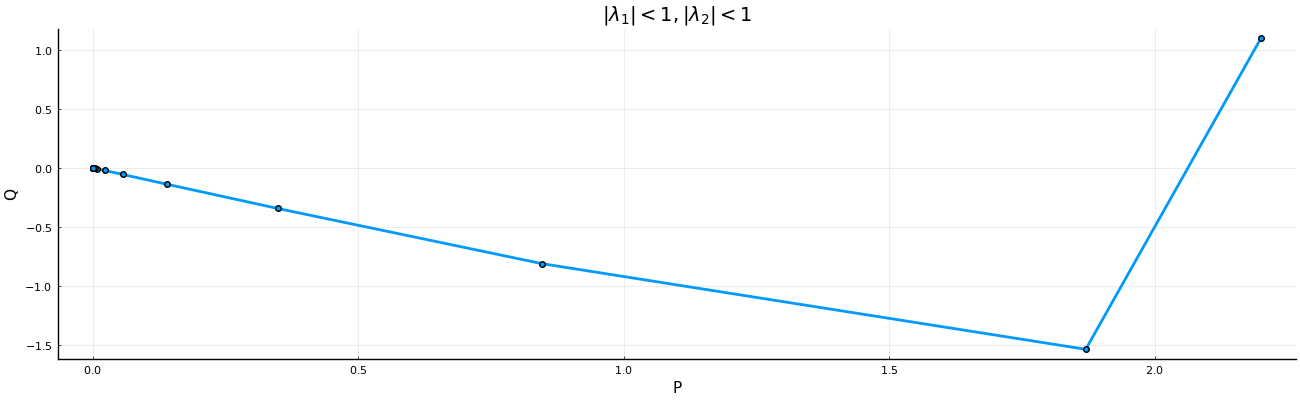

In [14]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=0.7*P+0.3*Q
    Q1=-0.6*P-0.2*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="",title=L"|\lambda_1| <1 , |\lambda_2|<1")
xaxis!("P")
yaxis!("Q")

P0=  2.2
Q0=  1.1
Timpul final =  20


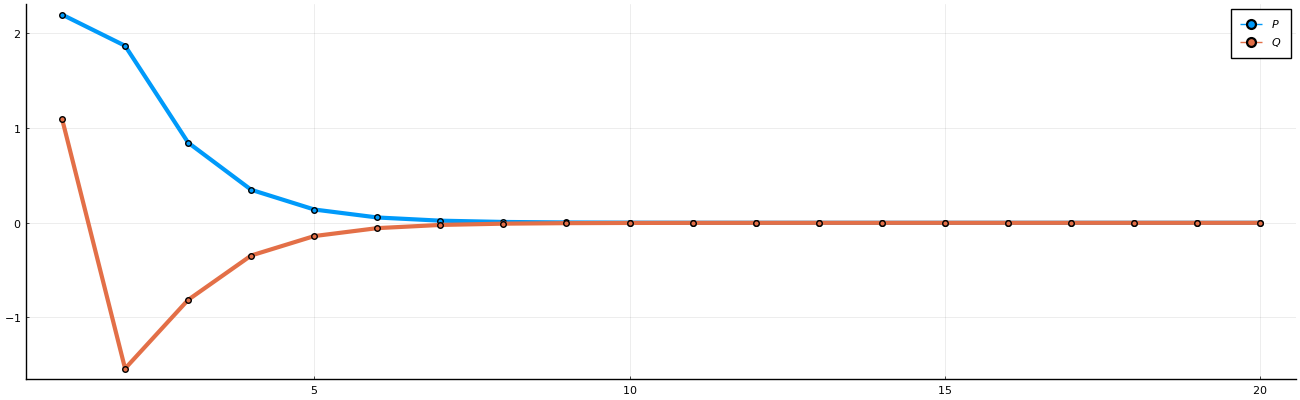

In [15]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=0.7*P+0.3*Q
    Q1=-0.6*P-0.2*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,label=L"P",linewidth=3,markershape = :circle,size=(1300,400))
plot!(Qs,label=L"Q",linewidth=3, markershape = :circle,size=(1300,400))

P0=  1.1
Q0=  -1.11
Timpul final =  100


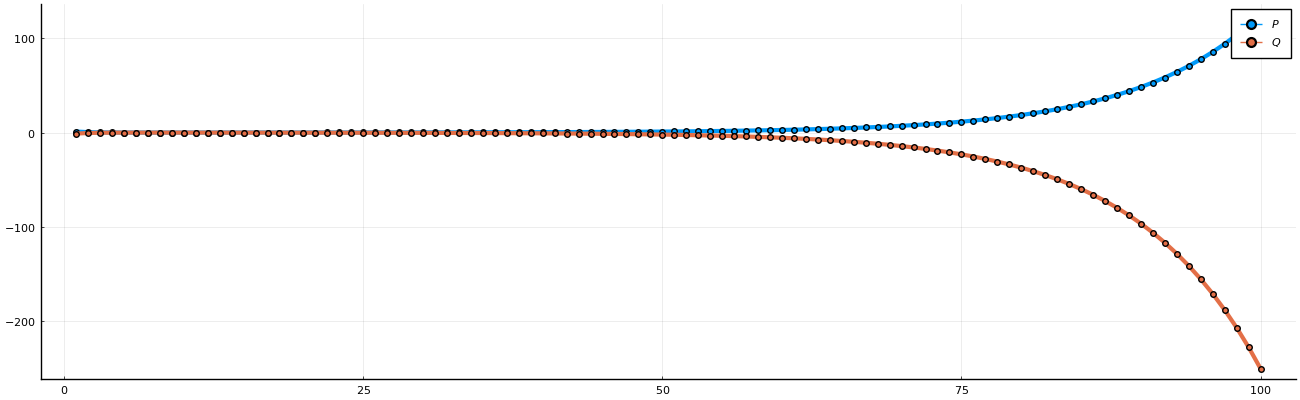

In [25]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=-0.3*P-0.7*Q
    Q1=1.4*P+1.8*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,label=L"P",linewidth=3,markershape = :circle,size=(1300,400))
plot!(Qs,label=L"Q",linewidth=3, markershape = :circle,size=(1300,400))

P0=  1.1
Q0=  -1.11
Timpul final =  60


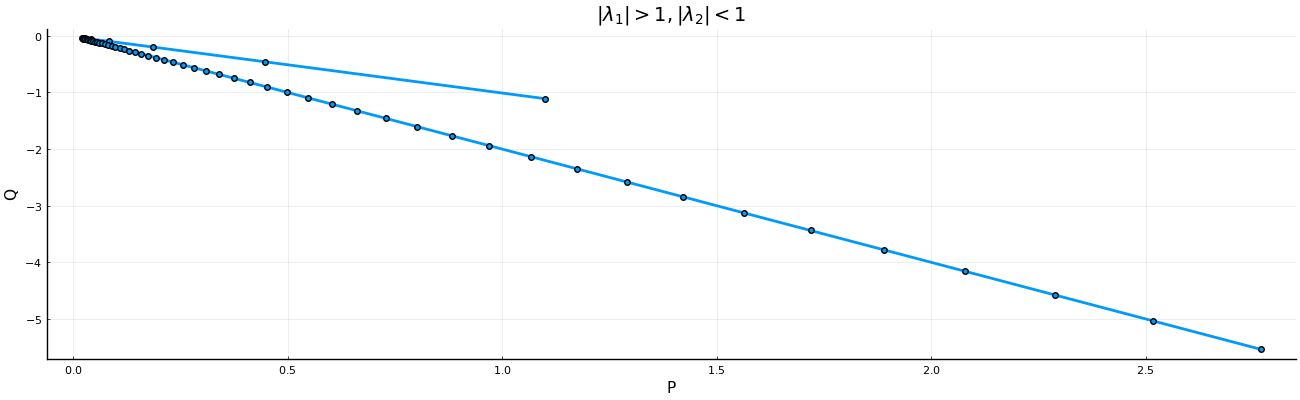

In [29]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=-0.3*P-0.7*Q
    Q1=1.4*P+1.8*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="",title=L"|\lambda_1| >1 , |\lambda_2|<1")
xaxis!("P")
yaxis!("Q")

P0=  1.2
Q0=  -1.1
Timpul final =  100


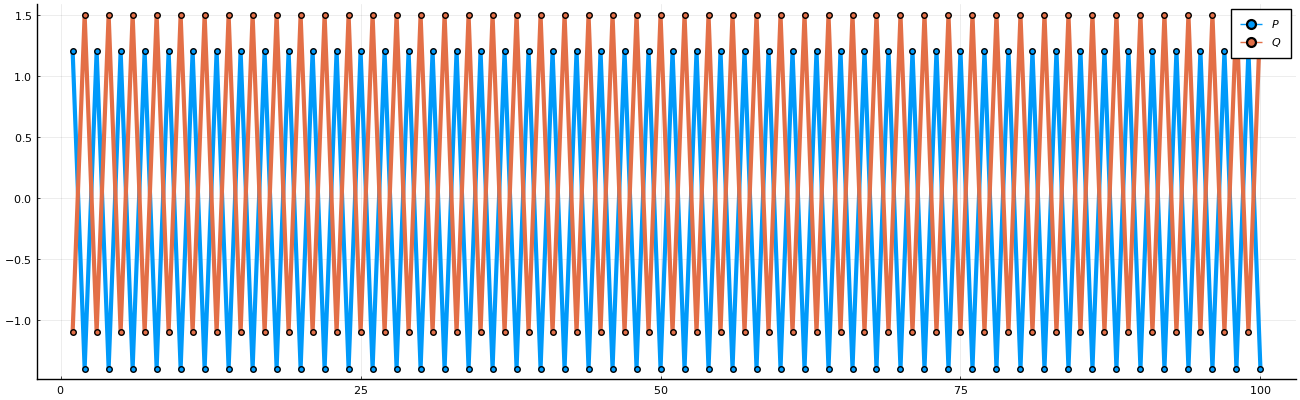

In [32]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=-3*P-2*Q
    Q1=4*P+3*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,label=L"P",linewidth=3,markershape = :circle,size=(1300,400))
plot!(Qs,label=L"Q",linewidth=3, markershape = :circle,size=(1300,400))

P0=  1.1
Q0=  2.1
Timpul final =  20


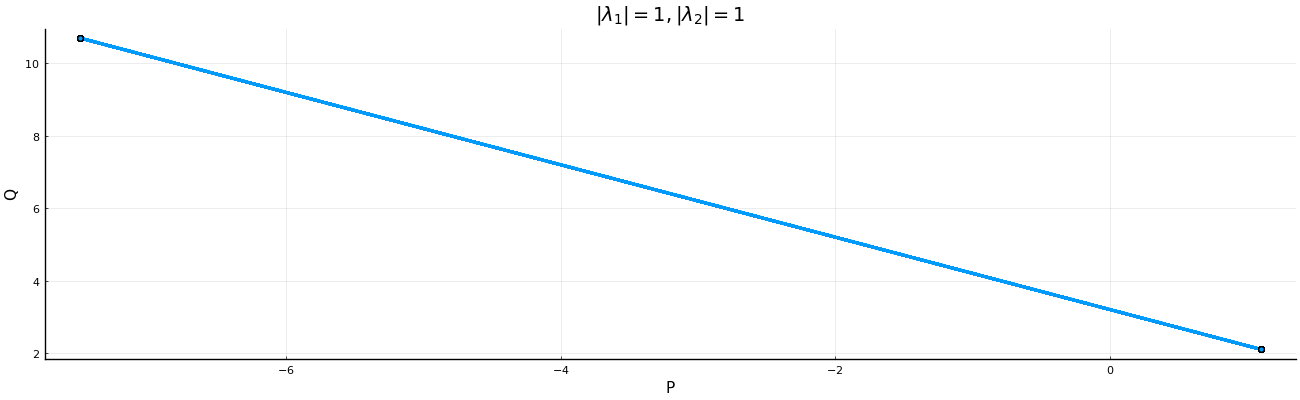

In [31]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=-3*P-2*Q
    Q1=4*P+3*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="",title=L"|\lambda_1| =1 , |\lambda_2|=1")
xaxis!("P")
yaxis!("Q")

P0=  1.1
Q0=  0.3
Timpul final =  30


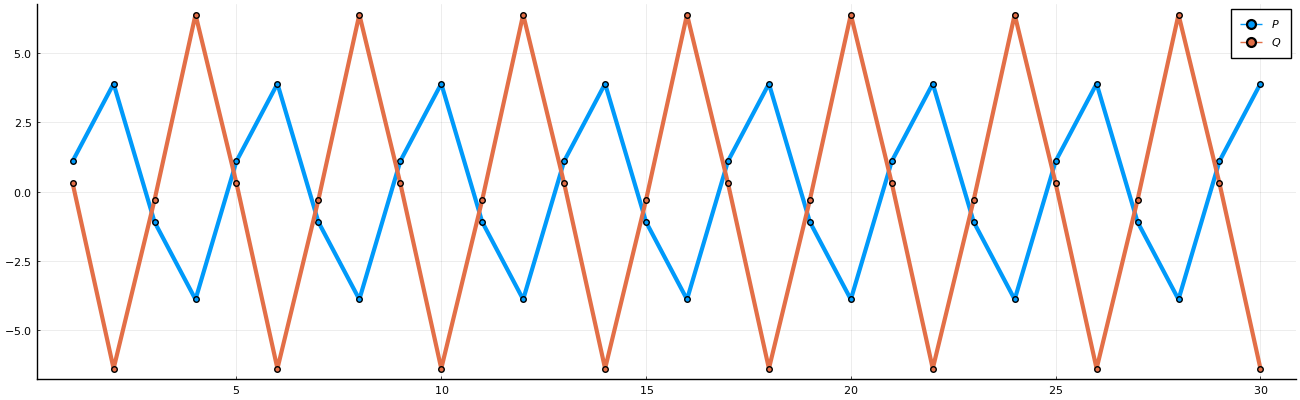

In [33]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=3*P+2*Q
    Q1=-5*P-3*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,label=L"P",linewidth=3,markershape = :circle,size=(1300,400))
plot!(Qs,label=L"Q",linewidth=3, markershape = :circle,size=(1300,400))

P0=  1.1
Q0=  0.4
Timpul final =  20


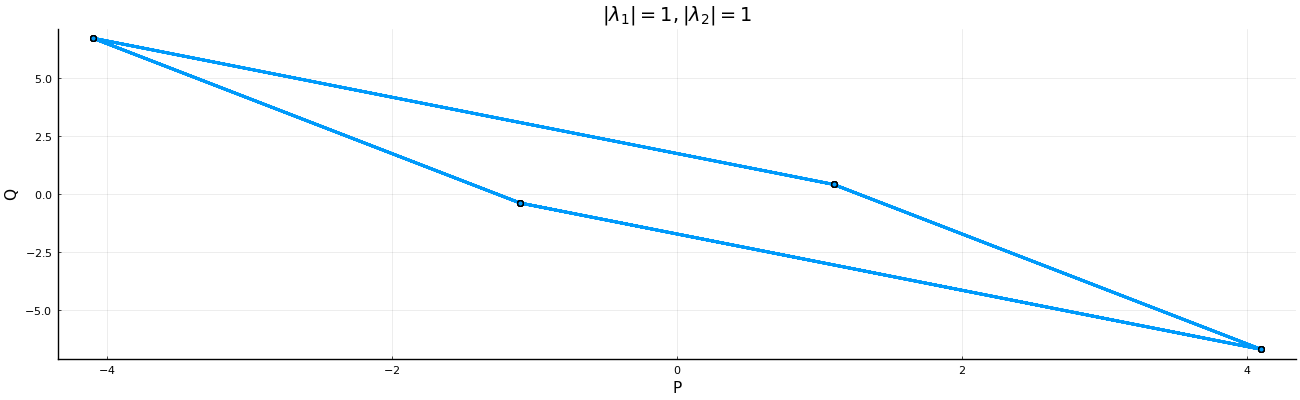

In [34]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=3*P+2*Q
    Q1=-5*P-3*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="",title=L"|\lambda_1| =1 , |\lambda_2|=1")
xaxis!("P")
yaxis!("Q")

P0=  1.1
Q0=  0.3
Timpul final =  20


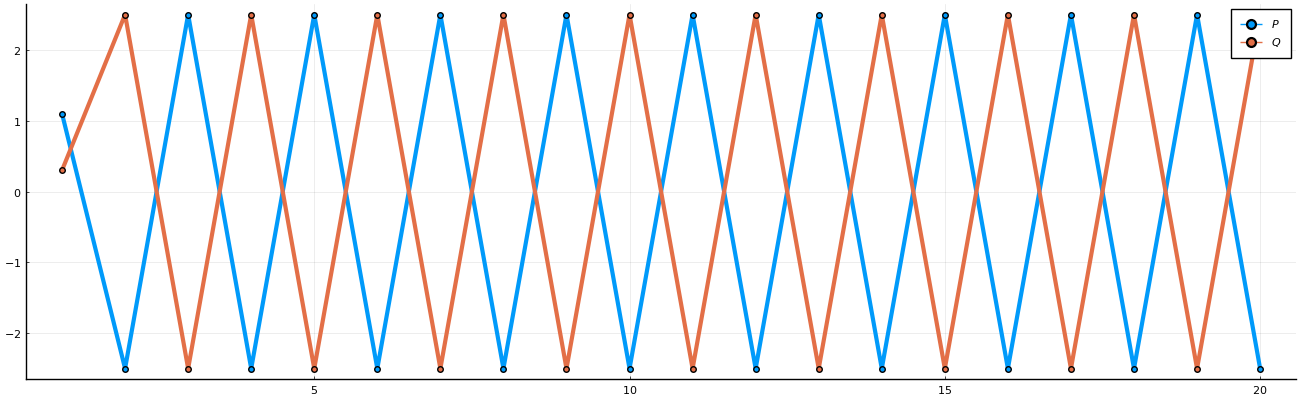

In [36]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=-2*P-Q
    Q1=2*P+Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,label=L"P",linewidth=3,markershape = :circle,size=(1300,400))
plot!(Qs,label=L"Q",linewidth=3, markershape = :circle,size=(1300,400))

P0=  1.2
Q0=  0.4
Timpul final =  20


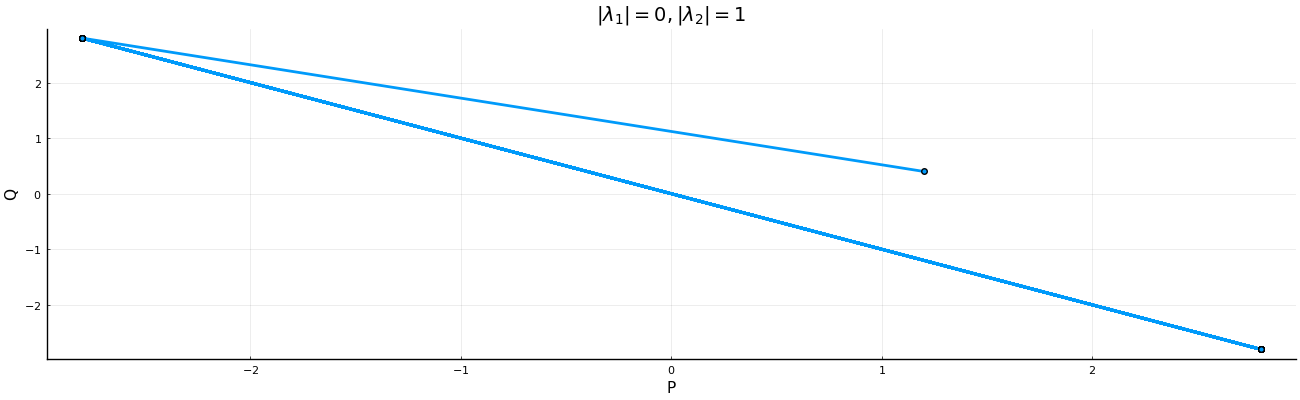

In [38]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=-2*P-Q
    Q1=2*P+Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="",title=L"|\lambda_1| =0 , |\lambda_2|=1")
xaxis!("P")
yaxis!("Q")

## Alte modele de interacțiuni 

### Concurența

Presupunem că două specii se află în competiție pentru aceeași nișă ecologică. Evoluția lor poate fi modelată de sistemul $$\begin{aligned}\Delta P & = rP\left(1-\frac{P+Q}{K}\right) \\ \Delta Q & = uQ\left(1-\frac{P+Q}{K}\right). \end{aligned}$$ Speciile concurează pentru aceleași resurse modelate de capacitatea de suport  a mediului. În absența celeilalte specii, fiecare populație crește conform modelului logistic, iar prezența unei noi specii reduce creșterea celeilalte. O problemă este dacă una din specii va pierde cursa sau cele două vor atinge un nivel la care să coexiste pe termen. 

Dacă luăm în considerare și interacțiunile negative între cele două specii modelul nostru se modifică la $$\begin{aligned}\Delta P & = rP\left(1-\frac{P+Q}{K}\right) -sPQ\\ \Delta Q & = uQ\left(1-\frac{P+Q}{K}\right)-vPQ. \end{aligned}$$

### Sistemul imunitar vs. agent infecțios

În cazul unei infecții interacțiunea dintre agentul infecțios și sistemul imunitar al organismului infectat este dăunătoare pentru ambele părți. Celulele produse pentru a compate infecția (spre exemplu limfocitele T) sînt distruse în procesul de anihilare al agenților patogeni. Să presupunem că $P$ este nivelul celulelor imunitare și $Q$ nivelul unei bacterii care infectează organismul. Modelul va fi $$\begin{aligned}\Delta P & = rQ - sPQ \\ \Delta Q & = uQ - vPQ.\end{aligned}$$ Termenul liniar din $\Delta P$ indică faptul că răspunsul imunitar este proporțional cu cantitatea de bacterii, termenul de acțiune măsoară efectul negativ asupra sistemului imunitar. Termenul liniar din $\Delta Q$ provine din faptul că bacteriile se reproduc proporțional cu numărul lor, iar termenul de acțiune măsoară efectul imunitar.

### Colaborarea

Se poate întîmpla ca două specii să aibă de cîștigat din interacțiunea între ele. Spre exemplu unele plante produc fructe ca să atragă păsările, iar acestea să răspîndească apoi semințele. Un model simplu ar putea fi $$\begin{aligned}\Delta P & = rP +sPQ \\ \Delta Q & = uQ + vPQ.\end{aligned}$$ Acest model prezice creșterea exponențială a ambelor populații și în plus avem o creștere și mai puternică datorată interacțiunilor. Evident că un astfel este nerealist. O ipoteză plauzibilă este că resursele limitate frînează creșterea uneia dintre populații, deci aceasta va fi evolua după un model logistic $$\begin{aligned}\Delta P & = rP\left(1 -\frac{P}{K}\right) +sPQ \\ \Delta Q & = -uQ + vPQ.\end{aligned}$$ Modificarea de semn din ecuația lui $\Delta Q$ semnifică faptul că în absența interacțiunilor, specia modelată de $Q$ va dispărea. Deci prezența speciei $P$ este esențială pentru specia $Q$, dar nu și reciproc.